## Gradient Descent Implementation

In this Python notebook we will go through an example of implementing **Gradient Descent** in simple and multiple linear regression, for this we will be using housing dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [7]:
pwd

'C:\\Users\\window 10\\Documents\\SKJ ML & AI\\UpGrad\\Course 3 - Machine Learning 1\\Linear Regression\\Gradient Descent in Python\\Gradient+Descent+Updated\\Gradient Descent Updated'

In [35]:
#Importing the dataset
#import pandas as pd
housing = pd.read_csv('../../housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [36]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [37]:
s = pd.Series(list('abcab'))
s

0    a
1    b
2    c
3    a
4    b
dtype: object

In [38]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0


In [39]:
s1 = ['a', 'b', np.nan]
s1

['a', 'b', nan]

In [40]:
ss1= pd.Series(s1)
pd.get_dummies(s1, dummy_na=True, drop_first=True)

,b,NaN
0,0,0
1,1,0
2,0,1


In [41]:
pd.get_dummies(housing['furnishingstatus'], dummy_na=True, drop_first=False)

,furnished,semi-furnished,unfurnished,NaN
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
540,0,0,1,0
541,0,1,0,0
542,0,0,1,0
543,1,0,0,0


In [43]:
#Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [44]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [46]:
# Normalisisng the data
housing = (housing - housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [52]:
indpdnt_var_X = housing['area'].head()
indpdnt_var_X

0    1.045766
1    1.755397
2    2.216196
3    1.082630
4    1.045766
Name: area, dtype: float64

In [53]:
dpdnt_var_y = housing['price'].head()
dpdnt_var_y

0    4.562174
1    4.000809
2    4.000809
3    3.982096
4    3.551716
Name: price, dtype: float64

In [51]:
# Simple linear regression
# Assign feature variable X
X = housing['area']

# Assign response variable to y
y = housing['price']

In [55]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

D:\Softwares\Anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


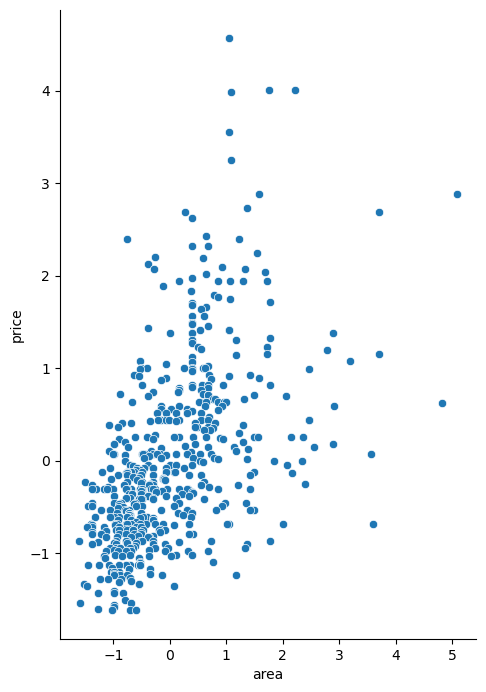

In [56]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(housing, x_vars='area', y_vars='price',size=7, aspect=0.7, kind='scatter')

D:\Softwares\Anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 300x300 with 0 Axes>

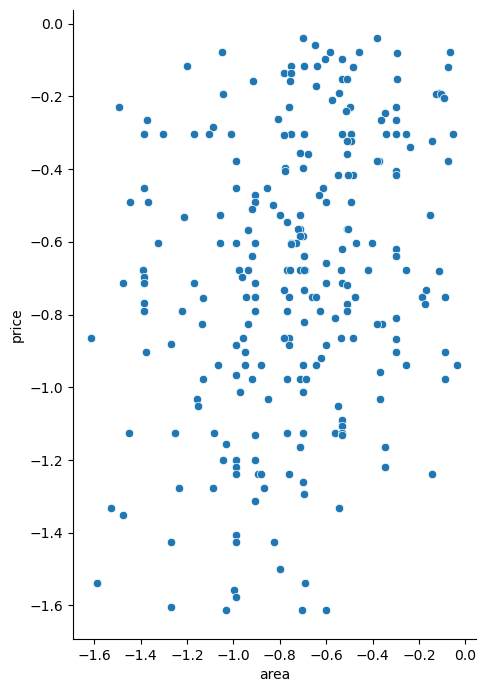

In [63]:
# zomming data b/w 0
# Visualise the relationship between the features and the response using scatterplots
plt.figure(figsize=(3, 3))
housing_btw_0 = housing[(housing['area'] <= 0) & (housing['price'] <= 0)]
sns.pairplot(housing_btw_0, x_vars='area', y_vars='price',size=7, aspect=0.7, kind='scatter')

**For linear regression we use a cost function known as the mean squared error or MSE.**

<img src="gd1.png"/>

Now we will apply partial derivative with respect to m and c and will equate it to zero to find the least value of m and c for which our cost function get the lowest value as possible.

<img src="gd2.png"/>

In [64]:
indpdnt_var_X = np.array(indpdnt_var_X)
indpdnt_var_X

array([1.04576555, 1.75539685, 2.2161964 , 1.08262951, 1.04576555])

In [65]:
dpdnt_var_y = np.array(dpdnt_var_y)
dpdnt_var_y

array([4.56217388, 4.00080852, 4.00080852, 3.98209634, 3.55171624])

In [66]:
print(type(indpdnt_var_X))
print()
print(type(dpdnt_var_y))

<class 'numpy.ndarray'>

<class 'numpy.ndarray'>


Now to apply gradient descent from scratch we need our X and y variables as numpy arrays, Let's convert them.

In [67]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [68]:
# Implement gradient descent function
# Takes in X, y, current m and c (both initialised to 0), num_iterations, learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X, y, m_current=0, c_current=0, iters=1000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)


In [69]:
# print gradients at multiple (m, c) pairs
# notice that gradient decreased gradually towards 0
# we have used 1000 iterations, can use more if needed
gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,0.010700,5.850570e-18,0.998165
1,0.021187,1.747023e-17,0.986830
2,0.031464,2.262003e-17,0.975943
3,0.041536,1.395011e-17,0.965486
4,0.051407,7.545442e-18,0.955442
...,...,...,...
995,0.535997,3.386486e-17,0.711399
996,0.535997,2.526012e-17,0.711399
997,0.535997,2.696314e-17,0.711399
998,0.535997,2.193556e-17,0.711399


<AxesSubplot:xlabel='index'>

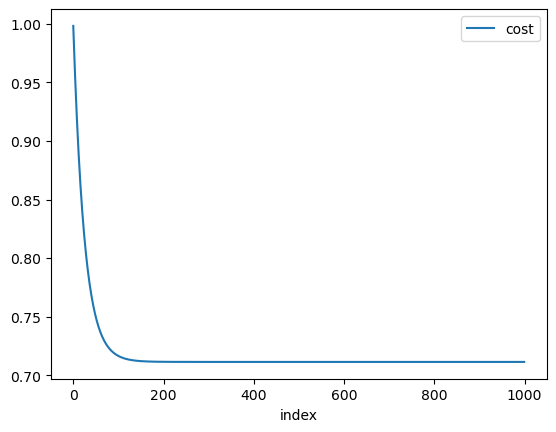

In [70]:
# plotting cost against num_iterations
gradients.reset_index().plot.line(x='index', y=['cost'])

### Multiple Regression: Applying Gradient Descent for Multiple (>1) Features

In [71]:
# Assigning feature variable X
X = housing[['area','bedrooms']]

# Assigning response variable y
y = housing['price']

In [81]:
# Add a columns of 1s as an intercept to X.
# The intercept column is needed for convenient matrix representation of cost function

X['intercept'] = 1
X = X.reindex(['intercept','area','bedrooms'], axis=1)
X.head()

C:\Users\window 10\AppData\Local\Temp\ipykernel_16004\3289245187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131


In [80]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.4.4
1.21.5
0.11.2


In [82]:
# Convert X and y to arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [83]:
# Theta is the vector representing coefficients (intercept, area, bedrooms)
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iterations = 1000

In [84]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

More on [Numpy Matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)

<img src="gd.png"/>

In [85]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [86]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[-2.0737743836117604e-18, 0.005350138644096799...",0.494906
1,"[-1.5319040633359959e-18, 0.010641328951860785...",0.490824
2,"[-2.921210673967843e-18, 0.015874226967184064,...",0.486834
3,"[-4.685344874564881e-18, 0.021049481374934634,...",0.482935
4,"[-3.870502287684032e-18, 0.026167733584010273,...",0.479124
...,...,...
995,"[4.687259754644056e-16, 0.4916558741575691, 0....",0.314176
996,"[4.697200834204003e-16, 0.49165609672441285, 0...",0.314176
997,"[4.68367444726178e-16, 0.49165631727115394, 0....",0.314176
998,"[4.682370699122771e-16, 0.49165653581645663, 0...",0.314176


<AxesSubplot:xlabel='index'>

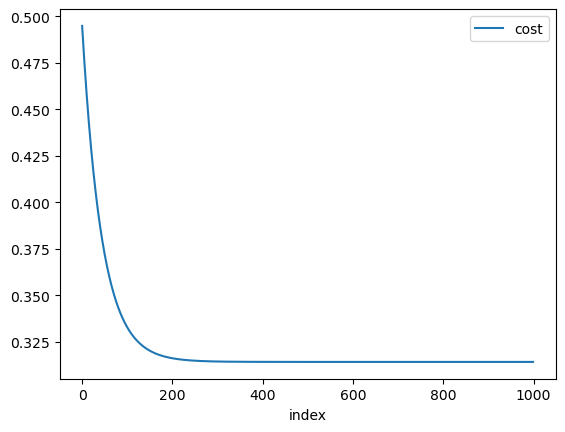

In [87]:
# print cost
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])